In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Chapter 5<br>Numerical Differentiation and Integration

## 5.1 Numerical Differentiation

In [2]:
e_mach = 2.220446049250313e-16

### Q. 1

In [3]:
def f(x):
    return np.sin(x) - np.cos(x)

def formula(x, h):
    return (f(x+h) - f(x-h))/(2*h)

x = 0
f_prime_x = 1
M = np.sqrt(2)

In [4]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),0.998334,-1.665834e-03
10**(-2),0.999983,-1.666658e-05
10**(-3),1.000000,-1.666666e-07
10**(-4),1.000000,-1.667110e-09
10**(-5),1.000000,-1.565337e-11
10**(-6),1.000000,-2.675549e-11
10**(-7),1.000000,-5.263558e-10
10**(-8),1.000000,-5.263558e-10
10**(-9),1.000000,2.722922e-08
10**(-10),1.000000,8.274037e-08


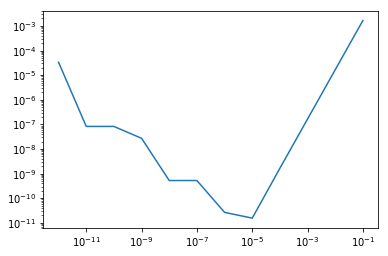

In [5]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [6]:
h = 10**(-5)
min_error = abs(formula(x, h) - f_prime_x)

h_min = (3*e_mach/M)**(1/3)
theoretical_min_error = abs(formula(x, h_min) - f_prime_x)

In [7]:
print("Computational minimum error: %e" % min_error)
print("Theoretical minimum error: %e" % theoretical_min_error)

Computational minimum error: 1.565337e-11
Theoretical minimum error: 1.172229e-11


The computational minimum error corresponds to the theoretical minimum error.

### Q. 2

In [8]:
def f(x):
    return 1/(1+x)

def formula(x, h):
    return (f(x+h) - f(x-h))/(2*h)

x = 1
f_prime_x = -0.25
M = 6/16

In [9]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),-0.250627,-6.265664e-04
10**(-2),-0.250006,-6.250156e-06
10**(-3),-0.250000,-6.249998e-08
10**(-4),-0.250000,-6.250280e-10
10**(-5),-0.250000,-9.964474e-12
10**(-6),-0.250000,-3.494449e-11
10**(-7),-0.250000,1.315890e-10
10**(-8),-0.250000,1.519368e-09
10**(-9),-0.250000,-2.068509e-08
10**(-10),-0.250000,-2.068509e-08


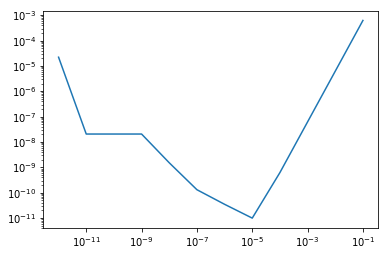

In [10]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [11]:
h = 10**(-5)
min_error = abs(formula(x, h) - f_prime_x)

h_min = (3*e_mach/M)**(1/3)
theoretical_min_error = abs(formula(x, h_min) - f_prime_x)

In [12]:
print("Computational minimum error: %e" % min_error)
print("Theoretical minimum error: %e" % theoretical_min_error)

Computational minimum error: 9.964474e-12
Theoretical minimum error: 8.180123e-12


The computational minimum error corresponds to the theoretical minimum error.

### Q. 3

In [13]:
def f(x):
    return np.sin(x) - np.cos(x)

def formula(x, h):
    return (f(x+h) - f(x))/h

x = 0
f_prime_x = 1
M = np.sqrt(2)

In [14]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),1.048293,4.829251e-02
10**(-2),1.004983,4.983292e-03
10**(-3),1.000500,4.998333e-04
10**(-4),1.000050,4.999833e-05
10**(-5),1.000005,4.999985e-06
10**(-6),1.000001,5.000732e-07
10**(-7),1.000000,4.943368e-08
10**(-8),1.000000,5.024759e-09
10**(-9),1.000000,-2.828193e-08
10**(-10),1.000000,8.274037e-08


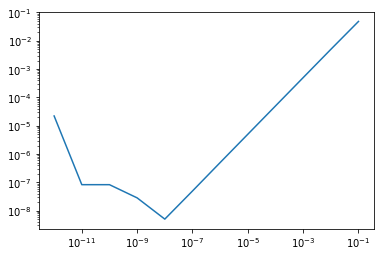

In [15]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [16]:
h = 10**(-8)
min_error = abs(formula(x, h) - f_prime_x)

# E(h) = f''(c)*h/2 + e_mach/h
h_min = (2*e_mach/M)**(1/2)
theoretical_min_error = abs(formula(x, h_min) - f_prime_x)

In [17]:
print("Computational minimum error: %e" % min_error)
print("Theoretical minimum error: %e" % theoretical_min_error)

Computational minimum error: 5.024759e-09
Theoretical minimum error: 5.656819e-09


The computational minimum error corresponds to the theoretical minimum error.

### Q. 4

In [18]:
def f(x):
    return 1/x

def formula(x, h):
    return (f(x+h) - f(x))/h

x = 1
f_prime_x = -1
M = 1

In [19]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),-0.909091,9.090909e-02
10**(-2),-0.990099,9.900990e-03
10**(-3),-0.999001,9.990010e-04
10**(-4),-0.999900,9.999000e-05
10**(-5),-0.999990,9.999894e-06
10**(-6),-0.999999,1.000060e-06
10**(-7),-1.000000,9.933621e-08
10**(-8),-1.000000,1.717970e-08
10**(-9),-1.000000,-8.274037e-08
10**(-10),-1.000000,-8.274037e-08


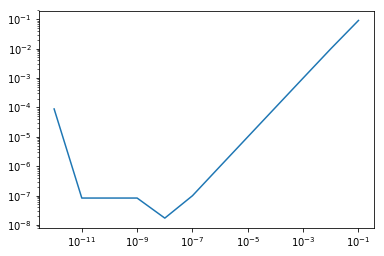

In [20]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [21]:
h = 10**(-8)
min_error = abs(formula(x, h) - f_prime_x)

# E(h) = f''(c)*h/2 + e_mach/h
h_min = (2*e_mach/M)**(1/2)
theoretical_min_error = abs(formula(x, h_min) - f_prime_x)

In [22]:
print("Computational minimum error: %e" % min_error)
print("Theoretical minimum error: %e" % theoretical_min_error)

Computational minimum error: 1.717970e-08
Theoretical minimum error: 1.711427e-08


The computational minimum error corresponds to the theoretical minimum error.

### Q. 5

In [23]:
# (a)
def f(x):
    return np.cos(x)

def formula(x, h):
    return (f(x+h) + f(x-h) - 2*f(x))/(h**2)

x = 0
f_2prime_x = -1

In [24]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_2prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),-0.999167,8.330556e-04
10**(-2),-0.999992,8.333305e-06
10**(-3),-1.000000,8.334899e-08
10**(-4),-1.000000,6.077471e-09
10**(-5),-1.000000,-8.274037e-08
10**(-6),-1.000089,-8.890058e-05
10**(-7),-0.999201,7.992778e-04
10**(-8),0.000000,1.000000e+00
10**(-9),0.000000,1.000000e+00
10**(-10),0.000000,1.000000e+00


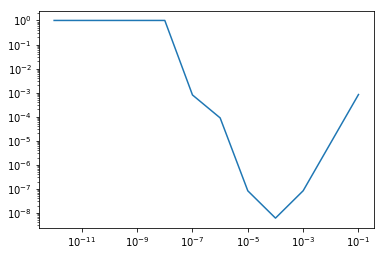

In [25]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_2prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [26]:
h = 10**(-4)
min_error = abs(formula(x, h) - f_2prime_x)

In [27]:
print("Computational minimum error occurs at x: %e" % h)
print("Computational minimum error: %e" % min_error)

Computational minimum error occurs at x: 1.000000e-04
Computational minimum error: 6.077471e-09


In [28]:
# (b)
def f(x):
    return 1/x

def formula(x, h):
    return (f(x+h) + f(x-h) - 2*f(x))/(h**2)

x = 1
f_2prime_x = 2

In [29]:
table = np.zeros((12, 2))
for i in range(12):
    h = 10**(-(i+1))
    
    table[i, 0] = formula(x, h)
    table[i, 1] = table[i, 0] - f_2prime_x
    
pd.DataFrame(table, columns=["Formula", "Error"], index=["10**(-%d)" % d for d in range(1, 13)])

,Formula,Error
10**(-1),2.020202,2.020202e-02
10**(-2),2.000200,2.000200e-04
10**(-3),2.000002,2.000457e-06
10**(-4),2.000000,-1.215494e-08
10**(-5),2.000000,1.654807e-07
10**(-6),2.000178,1.778012e-04
10**(-7),1.998401,-1.598556e-03
10**(-8),4.440892,2.440892e+00
10**(-9),0.000000,-2.000000e+00
10**(-10),0.000000,-2.000000e+00


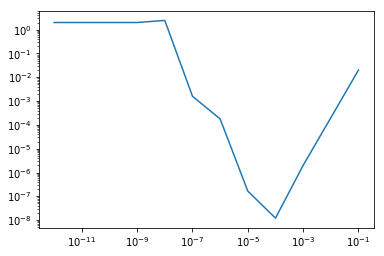

In [30]:
x_range = [10**(-1-i) for i in range(12)]
y_range = np.abs([formula(x, h) - f_2prime_x for h in x_range])

plt.plot(x_range, y_range)
plt.xscale('log')
plt.yscale('log')

plt.show()

In [31]:
h = 10**(-4)
min_error = abs(formula(x, h) - f_2prime_x)

In [32]:
print("Computational minimum error occurs at x: %e" % h)
print("Computational minimum error: %e" % min_error)

Computational minimum error occurs at x: 1.000000e-04
Computational minimum error: 1.215494e-08
